<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise5_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use sklearn.neighbors.KNeighborsClassifier(n_neighbors=3) and sklearn.linear_model.LogisticRegression(penalty=’l2’, hyperparameter C set to 1.0) to fit separate predictive models based on 100 brain regions of interest (see ‘n_rois’ argument for datasets.fetch_atlas_schaefer_2018) based on the first 80% of the 10, 20, 30, …100 (in steps of 10 until complete) region variables from structural brain scans to predict sex. Next, evaluate each fitted LogReg / kNN model on the unseen final 20% of the 100 structural brain scans and retrieve classification accuracy in XX.YY%. Please plot the classification accuracy on the test set (x axis=n_rois, y axis=prediction accuracy on test set, 2 lines with 2 colors for the 2 different prediction model classes).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 2.8 MB/s 


In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=100) # we fix this to 100 rois
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=int) # gives 1 for females and 0 for males

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 895705088 of 905208634 bytes (99.0%,    0.1s remaining) ...done. (11 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
 ...done. (0 seconds, 0 min)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# We prepare the models with the required parameters
logreg= LogisticRegression(max_iter=1e4, penalty = 'l2', C = 1, solver = 'saga')
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We prepare the iterating variable (ROI partitions)
r_var = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
# We pre-allocate the variables we want to populate with accuracy scores
ridge_tr_acc = []
knn_tr_acc = []

ridge_test_acc = []
knn_test_acc = []

In [ ]:
for x in r_var:

    X, y = input_variables, output_variable
    X = X[:,list(range(0,(x)))]
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=(0.2), shuffle=False)

    RidgeReg = logreg.fit(X_train,y_train) # We fit the ridge training model
    score_R = RidgeReg.score(X_train, y_train)
    score_R = np.multiply(score_R, 100)
    ridge_tr_acc.append(score_R) # We store the scores
    print('Ridge training accuracy: %.2f' % ((score_R))) # We print the scores

    kNN = knn.fit(X_train,y_train) # We fit the kNN training model
    score_k = kNN.score(X_train, y_train)
    score_k = np.multiply(score_k, 100) 
    knn_tr_acc.append(score_k) # We store the scores
    print('kNN training accuracy: %.2f' % ((score_k))) # We print the scores

    yhat_R = logreg.predict(X_test) # We use the ridge model to predict and store its prediction as "yhat"
    score_Rt = RidgeReg.score(X_test, y_test) 
    score_Rt = np.multiply(score_Rt, 100) 
    ridge_test_acc.append(score_Rt) # We store the scores
    print('Ridge test accuracy: %.2f' % ((score_Rt))) # We print the scores

    yhat_k = knn.predict(X_test) # We use the kNN model to predict and store its prediction as "yhat"
    score_k = kNN.score(X_test, y_test) 
    score_k = np.multiply(score_k, 100) 
    knn_test_acc.append(score_k) # We store the scores
    print('kNN test accuracy: %.2f' % ((score_k))) # We print the scores

Ridge training accuracy: 72.50
kNN training accuracy: 78.75
Ridge test accuracy: 40.00
kNN test accuracy: 70.00
Ridge training accuracy: 76.25
kNN training accuracy: 72.50
Ridge test accuracy: 55.00
kNN test accuracy: 60.00
Ridge training accuracy: 82.50
kNN training accuracy: 73.75
Ridge test accuracy: 60.00
kNN test accuracy: 80.00
Ridge training accuracy: 85.00
kNN training accuracy: 72.50
Ridge test accuracy: 50.00
kNN test accuracy: 60.00
Ridge training accuracy: 90.00
kNN training accuracy: 75.00
Ridge test accuracy: 60.00
kNN test accuracy: 75.00
Ridge training accuracy: 97.50
kNN training accuracy: 76.25
Ridge test accuracy: 55.00
kNN test accuracy: 75.00
Ridge training accuracy: 98.75
kNN training accuracy: 73.75
Ridge test accuracy: 65.00
kNN test accuracy: 60.00
Ridge training accuracy: 100.00
kNN training accuracy: 76.25
Ridge test accuracy: 55.00
kNN test accuracy: 60.00
Ridge training accuracy: 100.00
kNN training accuracy: 78.75
Ridge test accuracy: 65.00
kNN test accura

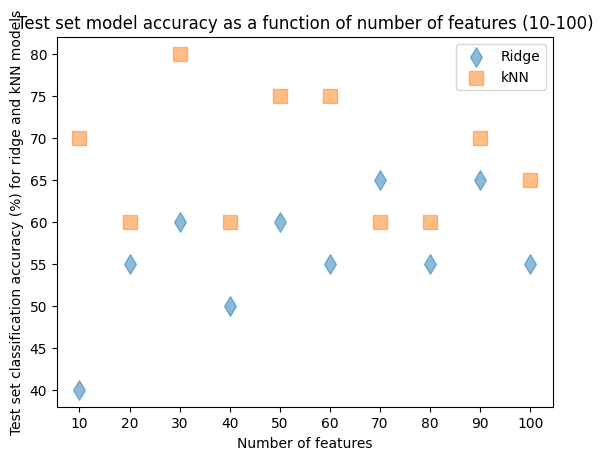

In [ ]:
# We're ready to plot
lab = ['Ridge', 'kNN']
plt.style.use("default")
plt.scatter(r_var,ridge_test_acc, s=100, alpha = 0.5, marker = 'd')
plt.scatter(r_var,knn_test_acc, s=100, alpha = 0.5, marker = 's')
plt.legend(labels=(lab))
plt.gca().set(
    title="Test set model accuracy as a function of number of features (10-100)",
    xlabel="Number of features",
    ylabel="Test set classification accuracy (%) for ridge and kNN models",
    xticks = (r_var)
)
plt.show()

It looks like the kNN model systematically outperforms the ridge model, regardless of the number of features. That said, the kNN model still does its best when number of features is relatively low, namely 30 (accuracy = 80%). 